# Quantum Computing with Continuous Variables (CVC)

In this tutorial, we will learn about quantum computing with continuous variables.

My proposal to present about:
* Quantum computing with continuous variables (CQVC)
* Some basic gates with CQVC and how to implement them

## Introduction

Quantum computing is a field of computer science that uses principles of quantum mechanics to perform calculations. Unlike classical computers, which use bits to represent data as 0s and 1s, quantum computers use qubits, which can be in a state of 0, 1, or any quantum superposition of these states. This allows quantum computers to process massive amounts of information simultaneously, potentially solving certain problems much faster than classical computers.

The term Quantum Computing was coined in 1982, when R. Feynman (Nobel Prize in Physics in 1965) proposed the use of quantum systems to simulate physical phenomena in general \cite{Feynman}, an area now known as ``Quantum Simulation'' \cite{simulators}.

Thus, the development of quantum computing protocols became a subject of study. In particular, one of the most famous algorithms is known as the decomposition algorithm proposed by P. Shor \cite{SHOR}, which is capable of factoring extremely large numbers in a number of steps that grows polynomially with the number of digits of the number to be factored, in contrast to the exponential growth of the best known classical algorithms.

# What is continuous variable quantum computing?

Continuous Variable Quantum Computing (CVQ) is a model of quantum computing that uses quantum systems whose properties, such as the position and momentum of a particle, can vary continuously. Instead of using qubits, this model uses continuous modes of light, such as quantum states of the electromagnetic field.

# Why use continuous variables?

There are several reasons to use continuous variables in quantum computing:

* Simpler Hardware: Continuous variable systems often use more mature and accessible technologies, such as lasers and light detectors, rather than complex qubit control devices.

* Ease of Manipulation: Continuous states, such as the coherent states of light, are relatively easier to generate, manipulate, and detect with high precision using standard optical techniques.

* Scalability: In some respects, continuous variable systems can be easier to scale, allowing for the creation of more efficient quantum communication networks and quantum cryptography protocols.

* Information Processing: Continuous variables can be used to implement certain quantum operations efficiently, facilitating tasks such as the quantum Fourier transform and other essential mathematical operations.


# The difference between qubit and continuous variable systems is most evident in the basic expansions of quantum states:

\begin{equation*}
\ket{\Psi} = a\ket{0}+ b\ket{1} , \textbf{Qubit},
\end{equation*}

\begin{equation*}
\ket{\Psi} = \int \psi(x) \ket{x} dx , \textbf{Qumode}.
\end{equation*}

For the case of a single quantum mode, we can perform the encoding of two real-valued variables (x,p) $\in \mathbb{R}^{2}$. For the case with $N$ modes, the phase space has $2N$ real variables $(x,p)$ that $\in R^N$. The states of the modes also have a representation as density vectors or matrices in Hilbert space in the Fock state basis $\{\ket{n}\}$, $n=0..\infty$, which are the eigenstates of the photon number operator $\hat{n} = ( \hat{x}^2 + \hat{p}^2 -1 )/2$.

The union of the areas of Quantum Computing and Machine Learning gave rise to the field of study called Quantum Machine Learning, with the aim of taking advantage of the advantages of both. In the development of the area, we observe two strands: the first consists of trying to implement classical ML algorithms in the language of quantum computers, while the second consists of developing new ML techniques exclusive to quantum models, with possible gains in relation to classical ML.

## Portas Lógicas em Computação Quântica com Variáveis Contínuas

In [ ]:
# First let's import some useful libraries
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# if we need , install the Strawberry Fields.
#!pip install strawberryfields --upgrade

A quantum circuit is always initialized in the state of vacuum (The vacuum state is the lowest energy Gaussian state). 

Here we learn how to create the vacuum state on a quantum circuit with one qumode.

We initialize the Strawberry Fields program. q represents a qumode and below we start with one qumode for our circuit.

In [ ]:
prog = sf.Program(1)

There are four main types of Operations:

* State preparation

* Gate application

* Measurements

These all use the following general syntax:

        Operation(args) | q

where args represents a list of parameters for the operation, and q is the qumode (or sequence of qumodes) the quantum operation acts upon. The symbol | always separates the operation to be applied (on the left) and the subsystem(s) it acts on (on the right)

In [ ]:
with prog.context as q:
    Vac | q[0]

eng = sf.Engine('gaussian')
result = eng.run(prog)
result.state

In the code above we have an example of how to prepare the state in the vacuum. In most algorithms we always consider the initial state to be 0, which means it is in the vacuum (the most fundamental state), but it is important to know that there is another way to prepare the initial state of the algorithm, as a terminal state or one of the fock bases.

Using matplotlib, we then plot the Wigner function of the vacuum state, which is a Gaussian distribution. The Wigner function quasi-probability illustrates negative and positive regions in phase space. We’ll notice below that Gaussian states such as the vacuum and squeezed state are in positive regions of phase space while non-Gaussian states can reach negative regions of the phase space. The y-axis on this plot can describe the $p$ quadrature or momentum operator and the x-axis describes the $x$ quadrature or position operator of the state.

In [ ]:
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = result.state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)

We can make a couple of observations from the Gaussian distribution above. We notice that it has positive quasi-probability everywhere. Later on, we’ll have a look at non-Gaussian gates that have regions of negative quasi-probability. The vacuum state is also centered at 0 on both the position axis $x$ and momentum axis $p$.

#### Squeeze

The Squeeze operation is given by:

\begin{equation*}
\hat{S}(z) = \exp{\Bigl[ \frac{1}{2}(z^*\hat{a}^{2} - z \hat{a}^{\dagger^2} )\Bigl]}
= \exp{\Bigl[ \frac{r}{2}(e^{-i\phi}\hat{a}^2 -e^{i\phi}\hat{a}^{\dagger^2} ) \Bigl] },
\end{equation*}

where $z = re^{i\phi}$, with magnitude $r \ge 0$ and phase $\phi \in [0,2\pi)$.

In CQVC, when applied to the vacuum state, compression produces different results compared to coherent displacement (i.e., $\hat{S}(z)\ket{0} = \ket{z}$). This operation can be used both in classical information coding and in algorithmic steps. Due to the uncertainty principle, compression of one of the quadratures leads to stretching of the other.

In [ ]:
prog = sf.Program(1)
with prog.context as q:
    S = Sgate(1)
    Vac | q[0]
    S   | q[0]


state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
fig.set_size_inches(4.8, 5)
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)

In the previous case using $r=1$ and $\phi=0$, we can change it

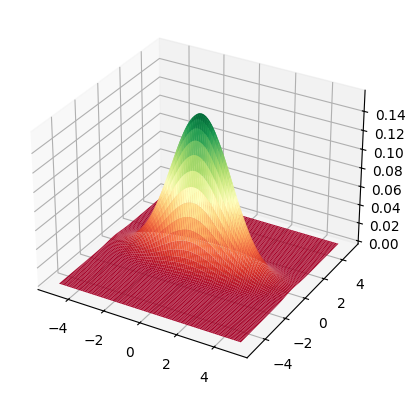

In [7]:
prog = sf.Program(1)
with prog.context as q:
    S = Sgate(0.5,np.pi)
    Vac | q[0]
    S   | q[0]


state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
fig.set_size_inches(4.8, 5)
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)

#### Rotation

The rotation operation is represented by:

\begin{equation*}
\hat{R}(\theta) = \exp{(i\theta \hat{a}^{\dagger}\hat{a} )}
= \exp{ \Bigl[ i\frac{\theta}{2}( \hat{x}^2+\hat{p}^2 - \hat{I} ) \Bigl]}.
\end{equation*}

When applied to a vacuum state, this operation has no effect. However, its application to a coherent state results in a rotation of $\theta$ of that state around the center of phase space.

In this case, applying the rotation in a vacuum does not change anything in the wigner function, so we will apply a squeeze and then the rotation.

Error in callback <function _draw_all_if_interactive at 0x00000238927ED760> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

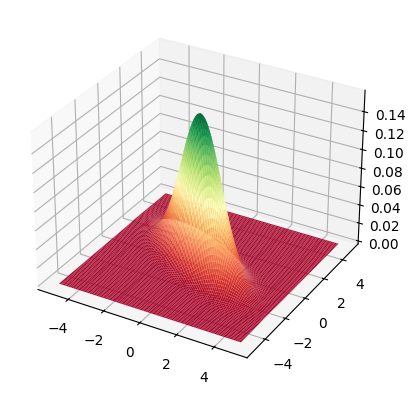

In [8]:
prog = sf.Program(1)
with prog.context as q:
    S = Sgate(0.5)
    Vac | q[0]
    S   | q[0]
    Rgate(np.pi/3) | q[0]

eng.reset()
state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)

Note that the result was identical to the squeeze case with the changes in the parameter values.

Displaciment:

\begin{equation}
\hat{D}(\alpha) = \exp{( \hat{a}\hat{a}^{\dagger} -\hat{a}^*\hat{a})}
= \exp{( -i\sqrt{2}(Re(\alpha)\hat{p} -Im(\alpha)\hat{x} ) )},
\end{equation}

where $\alpha = re^{i\theta}$ with magnitude $r \ge 0$ and phase $\theta \in [0,2\pi )$.

In CQCV, this operation is used both for encoding and as part of the subroutines of quantum algorithms. When applied to the vacuum state, the operation causes a shift in the phase space of the quantum state, transforming the state $ \ket{0}$ into $ \hat{D}(\alpha)\ket{0} =\ket{\alpha} $.

In [ ]:
prog = sf.Program(1)
with prog.context as q:
    Vac | q[0]
    Dgate(-1.4) | q[0]

eng.reset()
state = eng.run(prog).state
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)

#### Non-Gaussian Gates

Non-Gaussian gates, also called nonlinear gates, include cubic phase and $\textit{Kerr}$ gates, characterized by the parameters $\gamma$ and $\kappa$, respectively. They are described by:

\begin{equation*}
\hat{V}(\gamma) = \exp{(i\gamma \hat{x}^3 /3 ) },
\end{equation*}

and

\begin{equation*}
\hat{K}(\kappa) = \exp{(i\kappa (\hat{a}^{\dagger}\hat{a})^2 ) }.
\end{equation*}

In [ ]:
prog = sf.Program(1)
with prog.context as q:
    gamma = 0.5
    Vgate(gamma) | q[0]

#We use the fock backend and define the argument cutoff_dim
eng = sf.Engine('fock', backend_options={"cutoff_dim": 10})
state = eng.run(prog).state

fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(0, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
ax.set_axis_off()

An important detail is the cutoff value, it defines the size of the Hilbert space (or better Fock space) in which we will simulate our system, the larger it is, the heavier the simulation will be.

The last part of the circuit is the measurement in strawberryfield we have

* homodyne detection (MeasureHomodyne, as well as the shortcuts MeasureX and MeasureP),
* heterodyne detection (MeasureHD), and photon detection

Let's create a circuit to learn how to implement the measurements

In [ ]:
prog = sf.Program(1)
with prog.context as q:
    # inicial state 
    Vac | q[0]

    # Apply the Displacement gate to qumode 0
    alpha = 2.0 + 1j
    Dgate(np.abs(alpha), np.angle(alpha)) | q[0]

    # Apply the Rotation gate
    Rgate(3.14 / 2) | q[0]

    # Apply the Squeezing gate
    Sgate(1.0, 0.1) | q[0]


    # Homodyne measurement at angle phi
    phi = np.pi/4
    MeasureFock() | q[0]

#We use the fock backend and define the argument cutoff_dim
eng = sf.Engine('gaussian', backend_options={"cutoff_dim": 3})
state = eng.run(prog,shots=10)


Note that I changed the back-engine in the library at strawbarryfields we have several options see the link[https://strawberryfields.readthedocs.io/en/stable/code/sf_backends.html?highlight=backend] .

We changed the back-engine to increase the number of shots to 10.

In [ ]:
state.samples

Each sample represents a complete execution of the circuit. The numbers indicate the number of photons found in the circuit. Using these values, we can post-process the measurements to use as a result for some application.

For each application we will modify the circuit, base size, number of modes (here we use only 1 for illustration), and the way of measuring.

This tutorial is just your first step in your learning process.

As a future recommendation I recommend accessing the xanadu/pennylane and Strawbarryfields websites which contain several tutorials.

In particular I would like to make it clear that this tutorial was inspired by the public educational material from pennylane and Strawbarryfields

https://strawberryfields.ai/photonics/demos/run_blackbird.html

https://strawberryfields.ai/photonics/demos/run_teleportation.html

https://strawberryfields.ai/photonics/demos/run_gate_visualization.html